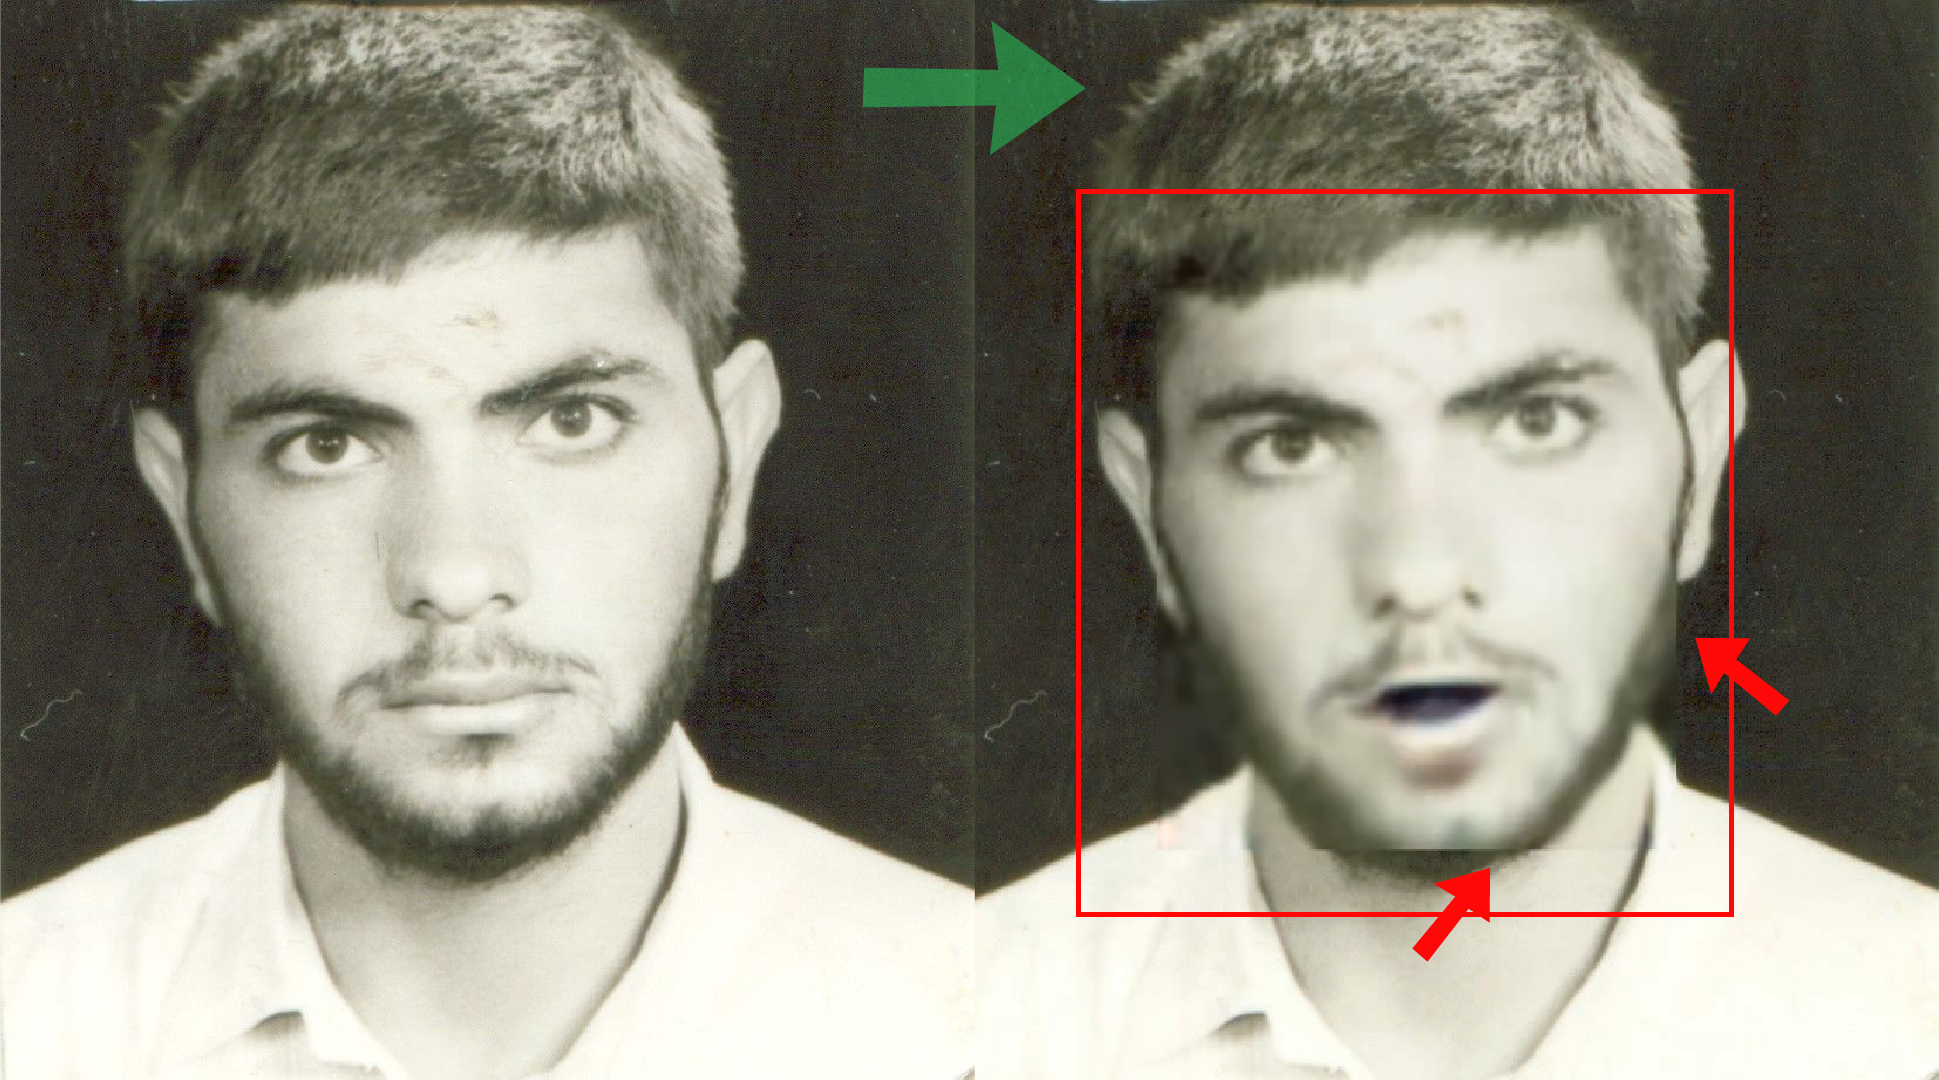

# I tried to fix this blurry area wav2lip generated

# **There is no need for colab pro to use it.**

# **Step1: Setup Wav2Lip**

In [ ]:
#@title <h1>Step1: Setup Wav2Lip</h1>
#@markdown * Install dependency
#@markdown * Download pretrained model
!rm -rf /content/sample_data
!mkdir /content/sample_data

!git clone https://github.com/zabique/Wav2Lip

#download the pretrained model
!wget 'https://iiitaphyd-my.sharepoint.com/personal/radrabha_m_research_iiit_ac_in/_layouts/15/download.aspx?share=EdjI7bZlgApMqsVoEUUXpLsBxqXbn5z8VTmoxp55YNDcIA' -O '/content/Wav2Lip/checkpoints/wav2lip_gan.pth'
a = !pip install https://raw.githubusercontent.com/AwaleSajil/ghc/master/ghc-1.0-py3-none-any.whl

# !pip uninstall tensorflow tensorflow-gpu
!cd Wav2Lip && pip install -r requirements.txt

#download pretrained model for face detection
!wget "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "/content/Wav2Lip/face_detection/detection/sfd/s3fd.pth"

!pip install -q youtube-dl
!pip install ffmpeg-python
!pip install librosa==0.9.1

#this code for recording audio
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

from IPython.display import clear_output
clear_output()
print("\nDone")

# **Step 2.Upload input_video.mp4 & input_audio.wav**

In [ ]:

%cd sample_data/
from google.colab import files
uploaded = files.upload()
%cd ..

# **Step 3: Create Wav2Lip video (using wav2lip_gan.pth) GAN**

In [ ]:

!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"

### **Step 4.Play result video -  50% scaling**



In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

# **Step 5 : Download Result.mp4 to your computer**

In [ ]:
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4')

# **step 6. Delete old uploaded samples & result files, so you can start over again**.

In [ ]:
%rm /content/sample_data/*
%rm /content/Wav2Lip/results/*
from IPython.display import clear_output
clear_output()
print("\nDone! now press X")

# **Step 7 :Batch processing - Upload -> process -> download -> play result**

In [ ]:
%cd sample_data/
%rm input_audio.wav
%rm input_video.mp4
from google.colab import files
uploaded = files.upload()
%cd ..
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4')
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

# **Variations to try**

In [ ]:
#@title 2.Use resize_factor to reduce the video resolution, as there is a change you might get better results for lower resolution videos. Why? Because the model was trained on low resolution faces.
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --resize_factor 2

In [ ]:
#@title 3.Use more padding to include the chin region (u can manually edit pads dimensions viewing and changing the code)
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --pads 0 20 0 0

In [ ]:
#@title 4.Play result video -  50% scaling
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 5.Download Result.mp4 to your computer
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4')